<a href="https://colab.research.google.com/github/earandir/DataAnalysis/blob/main/Modulo03/Sesion08/M03S08R06_lo_que_los_cientificos_aman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reto 6: Lo que los científicos aman

### 1. Objetivos:
    - Practicar las siguientes herramientas:
        - Lectura de .csv
        - `merge`
        - Filtros con value_counts()
        - Agrupaciones y reordenamientos
    
---
    
### 2. Desarrollo:

#### a) Lo que los científicos aman

En este Reto vamos a obtener una lista de las películas que fueron mejor evaluadas por científicos para saber cuáles son sus favoritas. Vamos a realizar los siguientes pasos:

1. Lee los archivos para `movies`, `ratings` y `users`.


In [1]:
import pandas as pd

In [2]:
ratings = pd.read_csv('ratings.csv', index_col=0)
ratings.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
users = pd.read_csv('users.csv', index_col=0)
users.reset_index(inplace=True)

In [4]:
movies = pd.read_csv('movies.csv', index_col=0)
movies.reset_index(inplace=True)

In [5]:
occupations = pd.read_csv('occupations.csv', index_col=0)
occupations.reset_index(inplace=True)

2. Agrega **solamente** la columna `occupation` al `DataFrame` `ratings`, para tener la información de las ocupaciones de los usuarios que realizaron los ratings.


In [6]:
ratings = pd.merge(ratings, users, left_on='user_id', right_index=True)

In [7]:
ratings = pd.merge(ratings, occupations, left_on='occupation', right_index=True)

In [8]:
ratings = ratings[['user_id', 'movie_id', 'rating', 'description']]

In [9]:
ratings.rename(columns={'description' :'occupation'},inplace=True)

3. Filtra tu tabla `ratings` para quedarte solamente con los ratings hechos por científicos.


In [10]:
ratings = ratings.loc[ratings['occupation'].isin(['scientist'])]

4. Agrega **solamente** la columna `title` de la tabla `movies` a la tabla `ratings` para tener la información de los nombres de las películas que fueron evaluadas por científicos.


In [11]:
ratings = pd.merge(ratings, movies, left_on='movie_id', right_index=True)

In [12]:
ratings = ratings[['user_id', 'movie_id', 'rating', 'occupation', 'title']]

5. Filtra tu `DataFrame` para quedarte **solamente** con las películas que fueron evaluadas más de 50 veces.


In [13]:
ratings = ratings.groupby('movie_id') \
  .agg(title=('title', 'max'), rating_count=('rating', 'size'), rating_mean=('rating', 'mean')) \
  .reset_index()

In [14]:
ratings = ratings.loc[ratings['rating_count'] >= 50]

6. Realiza una agrupación por película y computa el promedio de los ratings de cada película.


In [15]:
ratings[['movie_id', 'title', 'rating_count', 'rating_mean']]

,movie_id,title,rating_count,rating_mean
0,1,Jumanji (1995),141,4.191489
5,6,Sabrina (1995),72,3.666667
9,10,"American President, The (1995)",75,3.320000
16,17,Four Rooms (1995),57,3.842105
20,21,Copycat (1995),102,3.558824
...,...,...,...,...
2764,3755,Coyote Ugly (2000),96,3.343750
2771,3763,"Brain That Wouldn't Die, The (1962)",54,3.666667
2797,3793,"Cell, The (2000)",108,3.777778
2808,3809,"Art of War, The (2000)",63,3.285714


7. Ordena la `Serie` resultante descendentemente y asígnala  a la variable `mean_of_scientists_ratings_sorted`.

> **Nota**: el paso #5 es un poco complejo. No te desesperes si no encuentras una solución rápidamente. ¡Pídele a la experta que te guíe para que puedas resolverlo sin que te explote la cabeza!

In [16]:
mean_of_scientists_ratings_sorted = ratings.sort_values('rating_mean', ascending=False)

La celda de validación a continuación, considera que este reto es la culimnación de todo el módulo, así que presume tus resultados y hasta la vista!

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

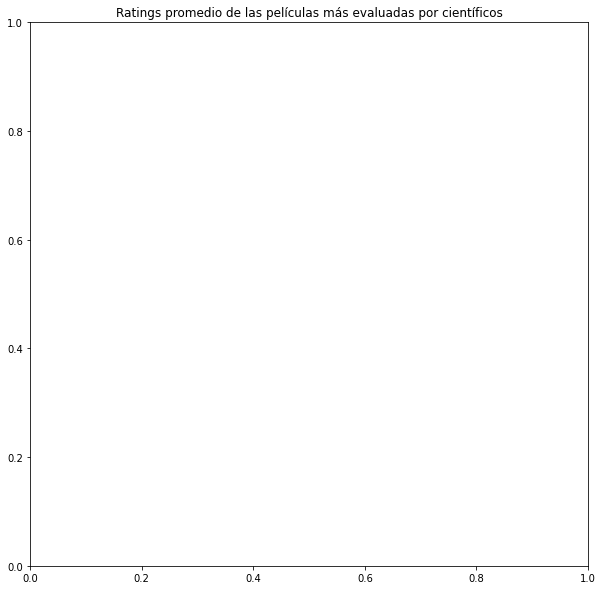

In [17]:
def visualizar_lista(mean_of_scientists_ratings_sorted):
    import matplotlib.pyplot as plt
    import seaborn as sns

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Ratings promedio de las películas más evaluadas por científicos')
    sns.barplot(mean_of_scientists_ratings_sorted.any(), mean_of_scientists_ratings_sorted.index, ax=ax)
    ax.set(ylabel='Título', xlabel='Rating Promedio')
    
visualizar_lista(mean_of_scientists_ratings_sorted)